In [21]:
import bilby
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
duration = 1
sampling_frequency = 1024
outdir = "visualising_the_results_old"
label = "example"

# value_inject = [74.8836223,70.7735457,0.216463133,2636.40961]
value_inject = [74.8836223,70.7735457,0.216463133,2636.40961]

injection_parameters = dict(
    mass_1=74.8836223,
    mass_2=70.7735457,
    geocent_time=0.216463133,
    a_1=0.0,
    a_2=0.0,
    tilt_1=0.0,
    tilt_2=1.0,
    phi_12=0.0,
    phi_jl=0.0,
    luminosity_distance=2636.40961,
    theta_jn=0.0,
    phase=0.0,
    ra=1.375,
    dec=-1.2108,
    psi=2.659,
)

In [23]:
# specify waveform arguments
waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2",  # waveform approximant name
    reference_frequency=20.0,  # gravitational waveform reference frequency (Hz)
)

# set up the waveform generator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    duration=duration,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameters=injection_parameters,
    waveform_arguments=waveform_arguments,
)

15:30 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [24]:
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    duration=duration,
    sampling_frequency=sampling_frequency,
    start_time=injection_parameters["geocent_time"] - duration/2.0,
)
_ = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

15:30 bilby INFO    : Injected signal in H1:
15:30 bilby INFO    :   optimal SNR = 19.60
15:30 bilby INFO    :   matched filter SNR = 20.26+0.38j
15:30 bilby INFO    :   mass_1 = 74.8836223
15:30 bilby INFO    :   mass_2 = 70.7735457
15:30 bilby INFO    :   geocent_time = 0.216463133
15:30 bilby INFO    :   a_1 = 0.0
15:30 bilby INFO    :   a_2 = 0.0
15:30 bilby INFO    :   tilt_1 = 0.0
15:30 bilby INFO    :   tilt_2 = 1.0
15:30 bilby INFO    :   phi_12 = 0.0
15:30 bilby INFO    :   phi_jl = 0.0
15:30 bilby INFO    :   luminosity_distance = 2636.40961
15:30 bilby INFO    :   theta_jn = 0.0
15:30 bilby INFO    :   phase = 0.0
15:30 bilby INFO    :   ra = 1.375
15:30 bilby INFO    :   dec = -1.2108
15:30 bilby INFO    :   psi = 2.659
15:30 bilby INFO    : Injected signal in L1:
15:30 bilby INFO    :   optimal SNR = 14.85
15:30 bilby INFO    :   matched filter SNR = 15.74-0.03j
15:30 bilby INFO    :   mass_1 = 74.8836223
15:30 bilby INFO    :   mass_2 = 70.7735457
15:30 bilby INFO    :   

In [25]:
# first, set up all priors to be equal to a delta function at their designated value
priors = bilby.gw.prior.BBHPriorDict(injection_parameters.copy())
# then, reset the priors on the masses and luminosity distance to conduct a search over these parameters
priors["mass_1"] = bilby.core.prior.Uniform(35, 80, "mass_1")
priors["mass_2"] = bilby.core.prior.Uniform(35, 80, "mass_2")
priors["geocent_time"] = bilby.core.prior.Uniform(
    0.15, 0.35, "geocent_time"
)
priors["luminosity_distance"] = bilby.core.prior.Uniform(
    1000, 3000, "luminosity_distance"
)

In [26]:
# compute the likelihoods
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

In [27]:
result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    npoints=100,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    walks=5,
    nact=2,
)

15:30 bilby INFO    : Running for label 'example', output will be saved to 'visualising_the_results_old'
15:30 bilby INFO    : Using lal version 7.1.7
15:30 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.1.7;Id: c0930b69d9f2ad7151d1cadea5df72633ec47e67;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
15:30 bilby INFO    : Using lalsimulation version 3.1.2
15:30 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v3.1.2;Id: 8c3a6977aa553c9a2019ec287a61dc5ee92087b4;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
15:30 bilby INFO    : Search parameters:
15:30 bilby INFO    :   mass_1 = Uniform(minimum=35, maximum=80, name='mass_1', latex_label='$m_1$', unit=None, boundary=None)
15:30 bilby INFO    :   mass_2 = Uniform(minimum=35, maximum=80, name='mass_2', latex_label='$m_2$', unit=None, boundary=None)
15:30 bilby INFO    :   geocent_time = Unifo

0it [00:00, ?it/s]

15:30 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 100, 'first_update': None, 'walks': 5, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 60, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x14bf2c850>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2, 'print_method': 'tqdm'}
15:30 bilby INFO    : Checkpoint every check_point_delta_t = 600s
15:30 bilby INFO    : Using dynesty version 1.0.1
15:30 bilby INFO    : Using the bilby-imp

15:30 bilby INFO    : Summary of results:
nsamples: 1601
ln_noise_evidence: -1330.340
ln_evidence: -997.021 +/-  0.471
ln_bayes_factor: 333.319 +/-  0.471



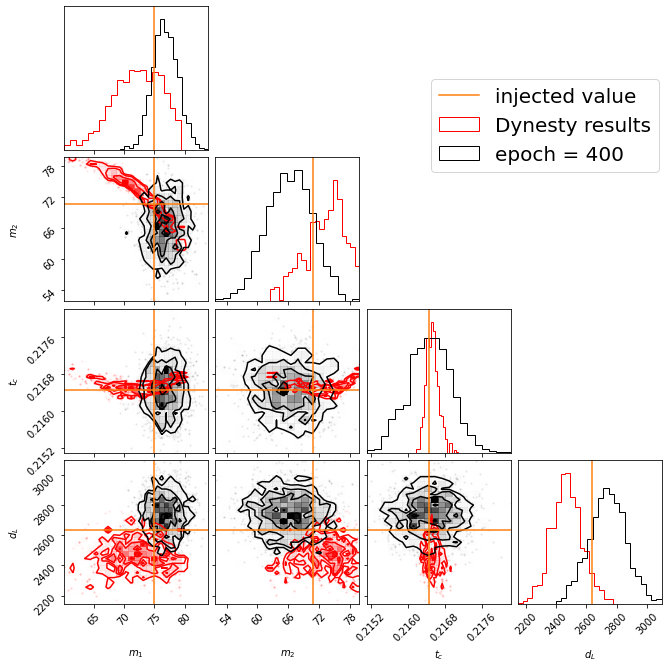

In [20]:
import corner

value_inject = [74.8836223,70.7735457,0.216463133,2636.40961]
samples = result.samples
labels = result.parameter_labels
fig = corner.corner(samples, labels=labels, color = 'red')
corner.overplot_lines(fig, value_inject, color="C1")
train_results = np.load('train_like.dat.npy')
idx = np.random.randint(10000, size = samples.shape[0])
train_results_sub = train_results[idx,:]
corner.corner(train_results_sub, fig=fig)
plt.legend(['injected value','Dynesty results','epoch = 400'],loc = [-0.6,3],fontsize = 20)
fig.savefig('comparison_2.png')
plt.show()
plt.close()